In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from functools import reduce
from sklearn import linear_model
from sklearn.model_selection import train_test_split  

In [3]:
crime = pd.read_excel('../data/crime/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',skiprows=4)
crime.columns = ['city', 'pop', 'violence',
       'manslaughter',
       'rape1', 'rape2',
       'robbery', 'aggravatedassault', 'propcrime', 'burglary',
       'theft', 'vehicletheft', 'arson3']
del crime['rape1']

In [4]:
crime

,city,pop,violence,manslaughter,rape2,robbery,aggravatedassault,propcrime,burglary,theft,vehicletheft,arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [5]:
crime = crime[crime['pop'].notnull()]
crime = crime.loc[crime['propcrime'].notnull()]
crime = crime.loc[crime['manslaughter'].notnull()]
crime = crime.loc[crime['pop'].isnull() == False]

In [6]:
features = pd.DataFrame()

In [7]:
features['propcrime'] = crime.propcrime
features['pop'] = crime['pop']
features['pop2'] = np.power(crime['pop'],2)
features['murder'] = crime['manslaughter'].apply(lambda val: 1 if val > 0 else 0)
features['robbery'] = crime['robbery'].apply(lambda val: 1 if val > 0 else 0)

In [8]:
# Sample data to play with.
y = features['propcrime'].values.reshape(-1, 1)
X = features[['pop','pop2','murder','robbery']]

print(np.shape(y))
print(np.shape(X))

(348, 1)
(348, 4)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [10]:
X_test

,pop,pop2,murder,robbery
6,1781.0,3.171961e+06,0,0
52,1733.0,3.003289e+06,0,0
269,9517.0,9.057329e+07,0,1
45,34462.0,1.187629e+09,0,0
294,3064.0,9.388096e+06,0,0
189,8769.0,7.689536e+07,0,1
191,5213.0,2.717537e+07,0,1
116,1926.0,3.709476e+06,0,0
90,7684.0,5.904386e+07,0,0
249,5123.0,2.624513e+07,0,1


In [7]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[ 3.62066415e-02 -2.29476745e-09 -2.61707600e+01 -1.18655157e+02]]
Intercept: 
 [-107.94326191]


In [9]:
regr.score(X_test,y_test)

0.326300053424033

In [21]:
# Extract predicted values.
predicted = regr.predict(X_test).ravel().reshape(70,1)
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

print(len(predicted),len(actual),len(residual))
np.shape(predicted)

70 70 70


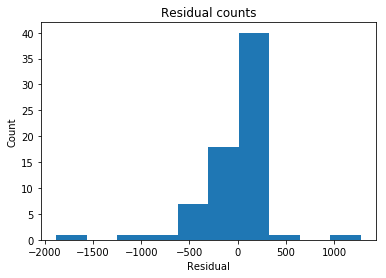

In [24]:
# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

_No normal distribution_

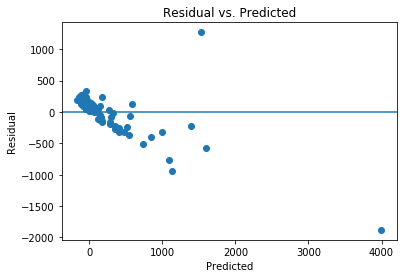

In [25]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

_Definitely not normally distributed. Has outliers and negative linear trend_

In [28]:
correlation_matrix = X.corr()
display(correlation_matrix)

,pop,pop2,murder,robbery
pop,1.000000,0.998264,0.162309,0.064371
pop2,0.998264,1.000000,0.133067,0.043983
murder,0.162309,0.133067,1.000000,0.313271
robbery,0.064371,0.043983,0.313271,1.000000
